### Time Series Scratchpad

In [42]:
# general imports
import pandas as pd
import requests
import numpy as np
from datetime import timedelta, datetime
import acquire
import prepare
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Exercises

The end result of this exercise should be a file named `prepare.py`.

### Using your store items data:

In [2]:
# Data Acquistion
df = acquire.get_groceries()

1. Convert date column to datetime format.  

In [3]:
def to_datetime(df, col):
    df[col] = pd.to_datetime(df[col]).sort_values()
    return df

In [5]:
df = to_datetime(df, 'sale_date')

2. Plot the distribution of `sale_amount` and `item_price`.  

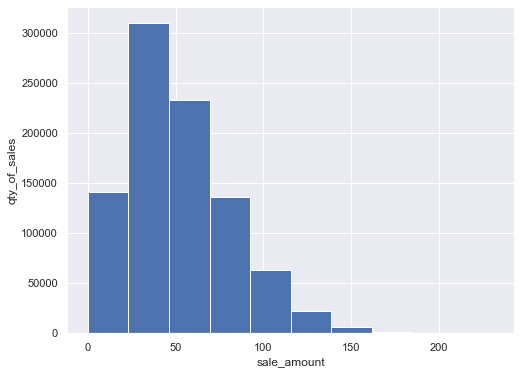

In [6]:
df.sale_amount.hist()
plt.xlabel('sale_amount')
plt.ylabel('qty_of_sales')
plt.show()

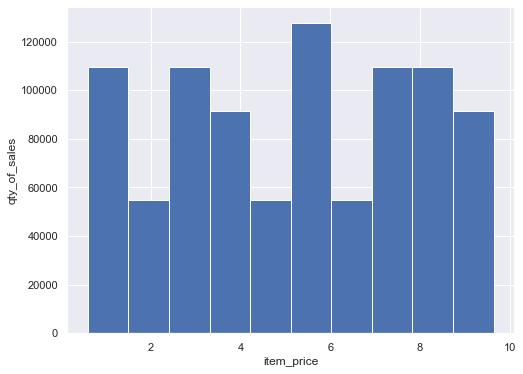

In [7]:
df.item_price.hist()
plt.xlabel('item_price')
plt.ylabel('qty_of_sales')
plt.show()

3. Set the index to be the datetime variable.

In [8]:
def index_reset(df, col):
    df = df.set_index(col).sort_index()
    return df

In [9]:
df = index_reset(df)

4. Add a 'month' and 'day of week' column to your dataframe.

In [10]:
def day_of_week(df):
    df['day_of_week'] = df.index.day_name()
    return df

In [11]:
df = day_of_week(df)

In [ ]:
def month(df):
    df['month'] = df.index.month_name()
    return df

In [ ]:
df = month(df)

5. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.  

In [12]:
# first I want to rename sale_amount to sale_qty and convert to int
def update_sales(df):
    df = df.rename(columns=({'sale_amount': 'sale_qty'}))
    df['sale_qty'] = df['sale_qty'].astype(int)
    return df

In [13]:
df = update_sales(df)

In [14]:
def create_sales_total(df):
    df['sales_total'] = df['sale_qty'] * df['item_price']
    return df

In [15]:
df = create_sales_total(df)

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [16]:
def prep_groceries(df):
    df = to_datetime(df)
    df = index_reset(df)
    df = day_of_week(df)
    df = month(df)
    df = update_sales(df)
    df = create_sales_total(df)
    return df

### Using the OPS data acquired in the Acquire exercises

In [30]:
df = acquire.get_opsd()
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18,nan,nan,nan
1,2006-01-02,1380.52,nan,nan,nan
2,2006-01-03,1442.53,nan,nan,nan
3,2006-01-04,1457.22,nan,nan,nan
4,2006-01-05,1477.13,nan,nan,nan


1. Convert date column to datetime format.  

In [33]:
def to_datetime(df, col):
    df[col] = pd.to_datetime(df[col]).sort_values()
    return df

In [34]:
df = to_datetime(df, 'Date')

2. Plot the distribution of each of your variables.  

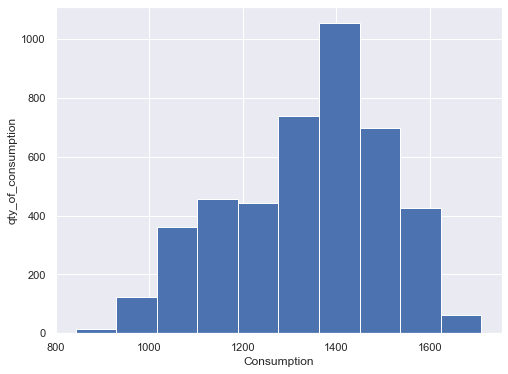

In [35]:
df.Consumption.hist()
plt.xlabel('Consumption')
plt.ylabel('qty_of_consumption')
plt.show()

3. Set the index to be the datetime variable.  

In [37]:
df = index_reset(df, 'Date')

4. Add a month and a year column to your dataframe.

In [40]:
def make_year(df):
    df['year'] = df.index.year
    return df

In [41]:
df = make_year(df)

5. Fill any missing values.

In [ ]:
def fill_missing(df):
    df = df.fillna(value = 0)
    return df

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
def prep_opsd(df, col):
    df = to_datetime(df, col)
    df = index_reset(df, col)
    df = month(df)
    df = make_year(df)
    df = fill_missing(df)
    return df